In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import random
from datetime import datetime, timedelta
import requests
import schedule
import time

## Extract information about Justin Trudeau from the Guardian API

In [2]:
api_key = 'cc3cf7ea-d7e3-433c-8292-d6edca2827d0' 
api_url = f'https://content.guardianapis.com/search?q=Justin%20Trudeau&api-key={api_key}'



## Create a DataFrame with relevant information

In [3]:
response = requests.get(api_url)
data = response.json()
articles = data['response']['results']
article_df = pd.DataFrame(articles)
article_df

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,world/2023/aug/02/justin-trudeau-sophie-gregoi...,article,world,World news,2023-08-02T17:16:37Z,Justin Trudeau and Sophie Grégoire Trudeau ann...,https://www.theguardian.com/world/2023/aug/02/...,https://content.guardianapis.com/world/2023/au...,False,pillar/news,News
1,world/2023/nov/09/justin-trudeau-montreal-cana...,article,world,World news,2023-11-09T22:56:11Z,Justin Trudeau condemns shots fired at two Jew...,https://www.theguardian.com/world/2023/nov/09/...,https://content.guardianapis.com/world/2023/no...,False,pillar/news,News
2,world/2023/sep/11/canada-pm-justin-trudeau-stu...,article,world,World news,2023-09-11T00:21:12Z,Canada PM Justin Trudeau stuck in India after ...,https://www.theguardian.com/world/2023/sep/11/...,https://content.guardianapis.com/world/2023/se...,False,pillar/news,News
3,world/2024/feb/29/brian-mulroney-canadian-pm-d...,article,world,World news,2024-02-29T23:35:00Z,"Brian Mulroney, former Canadian PM, dies aged 84",https://www.theguardian.com/world/2024/feb/29/...,https://content.guardianapis.com/world/2024/fe...,False,pillar/news,News
4,world/2024/feb/27/justin-welby-must-listen-to-...,article,world,World news,2024-02-27T18:14:04Z,Justin Welby must listen to Palestinian Christ...,https://www.theguardian.com/world/2024/feb/27/...,https://content.guardianapis.com/world/2024/fe...,False,pillar/news,News
5,sport/2024/mar/16/justin-fields-trade-pittsbur...,article,sport,Sport,2024-03-16T23:04:10Z,Chicago Bears trade Justin Fields to Pittsburg...,https://www.theguardian.com/sport/2024/mar/16/...,https://content.guardianapis.com/sport/2024/ma...,False,pillar/sport,Sport
6,world/2023/feb/08/canadas-justin-trudeau-greet...,article,world,World news,2023-02-08T01:13:46Z,Canada’s Justin Trudeau greets political oppon...,https://www.theguardian.com/world/2023/feb/08/...,https://content.guardianapis.com/world/2023/fe...,False,pillar/news,News
7,world/2023/sep/22/russia-ukraine-war-at-a-glan...,article,world,World news,2023-09-22T19:35:34Z,Russia-Ukraine war at a glance: what we know o...,https://www.theguardian.com/world/2023/sep/22/...,https://content.guardianapis.com/world/2023/se...,False,pillar/news,News
8,world/2023/mar/07/canada-pm-justin-trudeau-spe...,article,world,World news,2023-03-07T00:18:42Z,Justin Trudeau to appoint special rapporteur t...,https://www.theguardian.com/world/2023/mar/07/...,https://content.guardianapis.com/world/2023/ma...,False,pillar/news,News
9,world/2024/jan/23/canada-trudeau-emergencies-a...,article,world,World news,2024-01-23T19:57:21Z,Judge rebukes Trudeau for ‘not justified’ use ...,https://www.theguardian.com/world/2024/jan/23/...,https://content.guardianapis.com/world/2024/ja...,False,pillar/news,News


## Change Date time format

In [4]:
article_df['publication_date'] = pd.to_datetime(article_df['webPublicationDate']).dt.date
article_df


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,publication_date
0,world/2023/aug/02/justin-trudeau-sophie-gregoi...,article,world,World news,2023-08-02T17:16:37Z,Justin Trudeau and Sophie Grégoire Trudeau ann...,https://www.theguardian.com/world/2023/aug/02/...,https://content.guardianapis.com/world/2023/au...,False,pillar/news,News,2023-08-02
1,world/2023/nov/09/justin-trudeau-montreal-cana...,article,world,World news,2023-11-09T22:56:11Z,Justin Trudeau condemns shots fired at two Jew...,https://www.theguardian.com/world/2023/nov/09/...,https://content.guardianapis.com/world/2023/no...,False,pillar/news,News,2023-11-09
2,world/2023/sep/11/canada-pm-justin-trudeau-stu...,article,world,World news,2023-09-11T00:21:12Z,Canada PM Justin Trudeau stuck in India after ...,https://www.theguardian.com/world/2023/sep/11/...,https://content.guardianapis.com/world/2023/se...,False,pillar/news,News,2023-09-11
3,world/2024/feb/29/brian-mulroney-canadian-pm-d...,article,world,World news,2024-02-29T23:35:00Z,"Brian Mulroney, former Canadian PM, dies aged 84",https://www.theguardian.com/world/2024/feb/29/...,https://content.guardianapis.com/world/2024/fe...,False,pillar/news,News,2024-02-29
4,world/2024/feb/27/justin-welby-must-listen-to-...,article,world,World news,2024-02-27T18:14:04Z,Justin Welby must listen to Palestinian Christ...,https://www.theguardian.com/world/2024/feb/27/...,https://content.guardianapis.com/world/2024/fe...,False,pillar/news,News,2024-02-27
5,sport/2024/mar/16/justin-fields-trade-pittsbur...,article,sport,Sport,2024-03-16T23:04:10Z,Chicago Bears trade Justin Fields to Pittsburg...,https://www.theguardian.com/sport/2024/mar/16/...,https://content.guardianapis.com/sport/2024/ma...,False,pillar/sport,Sport,2024-03-16
6,world/2023/feb/08/canadas-justin-trudeau-greet...,article,world,World news,2023-02-08T01:13:46Z,Canada’s Justin Trudeau greets political oppon...,https://www.theguardian.com/world/2023/feb/08/...,https://content.guardianapis.com/world/2023/fe...,False,pillar/news,News,2023-02-08
7,world/2023/sep/22/russia-ukraine-war-at-a-glan...,article,world,World news,2023-09-22T19:35:34Z,Russia-Ukraine war at a glance: what we know o...,https://www.theguardian.com/world/2023/sep/22/...,https://content.guardianapis.com/world/2023/se...,False,pillar/news,News,2023-09-22
8,world/2023/mar/07/canada-pm-justin-trudeau-spe...,article,world,World news,2023-03-07T00:18:42Z,Justin Trudeau to appoint special rapporteur t...,https://www.theguardian.com/world/2023/mar/07/...,https://content.guardianapis.com/world/2023/ma...,False,pillar/news,News,2023-03-07
9,world/2024/jan/23/canada-trudeau-emergencies-a...,article,world,World news,2024-01-23T19:57:21Z,Judge rebukes Trudeau for ‘not justified’ use ...,https://www.theguardian.com/world/2024/jan/23/...,https://content.guardianapis.com/world/2024/ja...,False,pillar/news,News,2024-01-23


## Articles published since 01.01.2018

In [5]:
start_date = pd.to_datetime('2018-01-01').date()
article_df = article_df[article_df['publication_date'] >= start_date]
article_df


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,publication_date
0,world/2023/aug/02/justin-trudeau-sophie-gregoi...,article,world,World news,2023-08-02T17:16:37Z,Justin Trudeau and Sophie Grégoire Trudeau ann...,https://www.theguardian.com/world/2023/aug/02/...,https://content.guardianapis.com/world/2023/au...,False,pillar/news,News,2023-08-02
1,world/2023/nov/09/justin-trudeau-montreal-cana...,article,world,World news,2023-11-09T22:56:11Z,Justin Trudeau condemns shots fired at two Jew...,https://www.theguardian.com/world/2023/nov/09/...,https://content.guardianapis.com/world/2023/no...,False,pillar/news,News,2023-11-09
2,world/2023/sep/11/canada-pm-justin-trudeau-stu...,article,world,World news,2023-09-11T00:21:12Z,Canada PM Justin Trudeau stuck in India after ...,https://www.theguardian.com/world/2023/sep/11/...,https://content.guardianapis.com/world/2023/se...,False,pillar/news,News,2023-09-11
3,world/2024/feb/29/brian-mulroney-canadian-pm-d...,article,world,World news,2024-02-29T23:35:00Z,"Brian Mulroney, former Canadian PM, dies aged 84",https://www.theguardian.com/world/2024/feb/29/...,https://content.guardianapis.com/world/2024/fe...,False,pillar/news,News,2024-02-29
4,world/2024/feb/27/justin-welby-must-listen-to-...,article,world,World news,2024-02-27T18:14:04Z,Justin Welby must listen to Palestinian Christ...,https://www.theguardian.com/world/2024/feb/27/...,https://content.guardianapis.com/world/2024/fe...,False,pillar/news,News,2024-02-27
5,sport/2024/mar/16/justin-fields-trade-pittsbur...,article,sport,Sport,2024-03-16T23:04:10Z,Chicago Bears trade Justin Fields to Pittsburg...,https://www.theguardian.com/sport/2024/mar/16/...,https://content.guardianapis.com/sport/2024/ma...,False,pillar/sport,Sport,2024-03-16
6,world/2023/feb/08/canadas-justin-trudeau-greet...,article,world,World news,2023-02-08T01:13:46Z,Canada’s Justin Trudeau greets political oppon...,https://www.theguardian.com/world/2023/feb/08/...,https://content.guardianapis.com/world/2023/fe...,False,pillar/news,News,2023-02-08
7,world/2023/sep/22/russia-ukraine-war-at-a-glan...,article,world,World news,2023-09-22T19:35:34Z,Russia-Ukraine war at a glance: what we know o...,https://www.theguardian.com/world/2023/sep/22/...,https://content.guardianapis.com/world/2023/se...,False,pillar/news,News,2023-09-22
8,world/2023/mar/07/canada-pm-justin-trudeau-spe...,article,world,World news,2023-03-07T00:18:42Z,Justin Trudeau to appoint special rapporteur t...,https://www.theguardian.com/world/2023/mar/07/...,https://content.guardianapis.com/world/2023/ma...,False,pillar/news,News,2023-03-07
9,world/2024/jan/23/canada-trudeau-emergencies-a...,article,world,World news,2024-01-23T19:57:21Z,Judge rebukes Trudeau for ‘not justified’ use ...,https://www.theguardian.com/world/2024/jan/23/...,https://content.guardianapis.com/world/2024/ja...,False,pillar/news,News,2024-01-23


## The number of articles published per day

In [6]:
article_count = article_df.groupby('publication_date').size().reset_index(name='No. of articles')
article_count

,publication_date,No. of articles
0,2023-02-08,1
1,2023-03-07,1
2,2023-08-02,1
3,2023-09-11,1
4,2023-09-22,1
5,2023-11-09,1
6,2024-01-23,1
7,2024-02-27,1
8,2024-02-29,1
9,2024-03-16,1


## The average number of articles per day

In [7]:
average_articles = article_count['No. of articles'].mean()
average_articles

1.0

## The section with the most articles written

In [8]:
most_articles_section = article_df['sectionName'].value_counts().idxmax()
most_articles_section

'World news'

## The evolution of the "No. of articles" over time

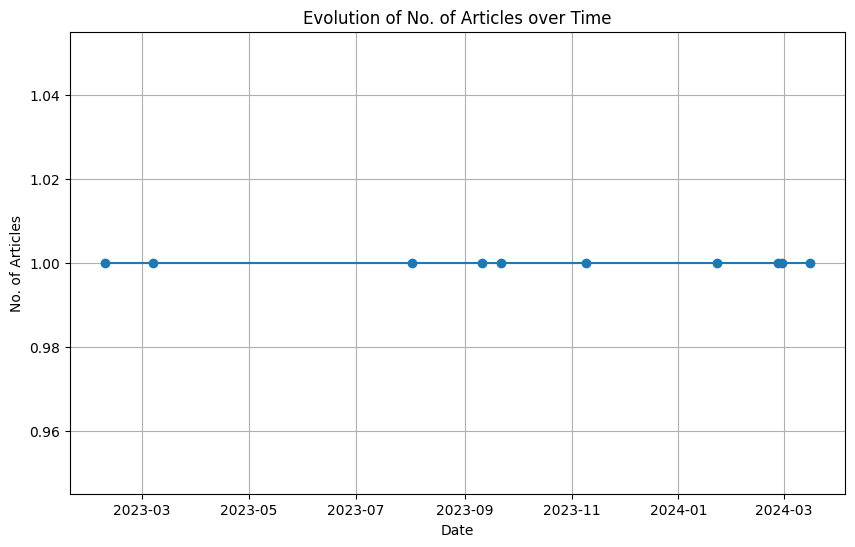

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(article_count['publication_date'], article_count['No. of articles'], marker='o')
plt.title('Evolution of No. of Articles over Time')
plt.xlabel('Date')
plt.ylabel('No. of Articles')
plt.grid(True)
plt.show()


## Checking abnormal data

In [10]:
std_dev = article_count['No. of articles'].std()
article_count['Z_score'] = (article_count['No. of articles'] - average_articles) / std_dev
unusual_events = article_count[article_count['Z_score'] > 2]  
unusual_events

,publication_date,No. of articles,Z_score


## The job to run daily at a specific time (e.g., 9:00 AM)

In [ ]:
def update_articles():
    print("Updating articles...")
    api_key = 'cc3cf7ea-d7e3-433c-8292-d6edca2827d0'  
    api_url = f'https://content.guardianapis.com/search?q=Justin%20Trudeau&api-key={api_key}'

    response = requests.get(api_url)
    data = response.json()

    articles = data['response']['results']
    article_df = pd.DataFrame(articles)

    article_df['publication_date'] = pd.to_datetime(article_df['webPublicationDate']).dt.date

    start_date = pd.to_datetime('2018-01-01').date()
    article_df = article_df[article_df['publication_date'] >= start_date]

    article_count = article_df.groupby('publication_date').size().reset_index(name='No. of articles')

    article_count.to_csv('article_evolution.csv', index=False)

    print("Daily update complete.")

schedule.every().day.at("09:00").do(update_articles)

while True:
    schedule.run_pending()
    time.sleep(1)

Updating articles...
Daily update complete.
